Below are the datasets

## 1. Installing Necessary Libraires and dependencies


In [ ]:
%pip install yfinance


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.4
!pip install pmdarima==1.8.5


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.3
Uninstalling pmdarima-2.0.3:
  Successfully uninstalled pmdarima-2.0.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 104.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 639.7/639.7 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pmdarima
  Running setup.py clean for pmdarima
Failed to build pmdarima
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pmdarima)


In [ ]:
!pip uninstall -y numpy pmdarima


Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4


In [ ]:
!pip install numpy==1.24.4
!pip install pmdarima==1.8.4


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.5/631.5 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pmdarima
  Running setup.py clean for pmdarima
Failed to build pmdarima
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pmdarima)


## 2. Downloading and Visualizing Data (Yahoo Finance - NVIDIA)

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "NVDA"
data = yf.download(ticker, period="10y").copy()

data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-04-20,0.532178,0.540610,0.531215,0.537238,231624000
2015-04-21,0.531456,0.538683,0.528806,0.538683,230456000
2015-04-22,0.537478,0.538201,0.526396,0.534588,207420000
2015-04-23,0.535310,0.540369,0.521578,0.527601,259380000
2015-04-24,0.530733,0.535310,0.524710,0.535069,240960000
2015-04-27,0.534828,0.544224,0.527842,0.532419,248456000
2015-04-28,0.537478,0.539406,0.528806,0.533865,234484000
2015-04-29,0.533383,0.538924,0.531215,0.533624,195156000


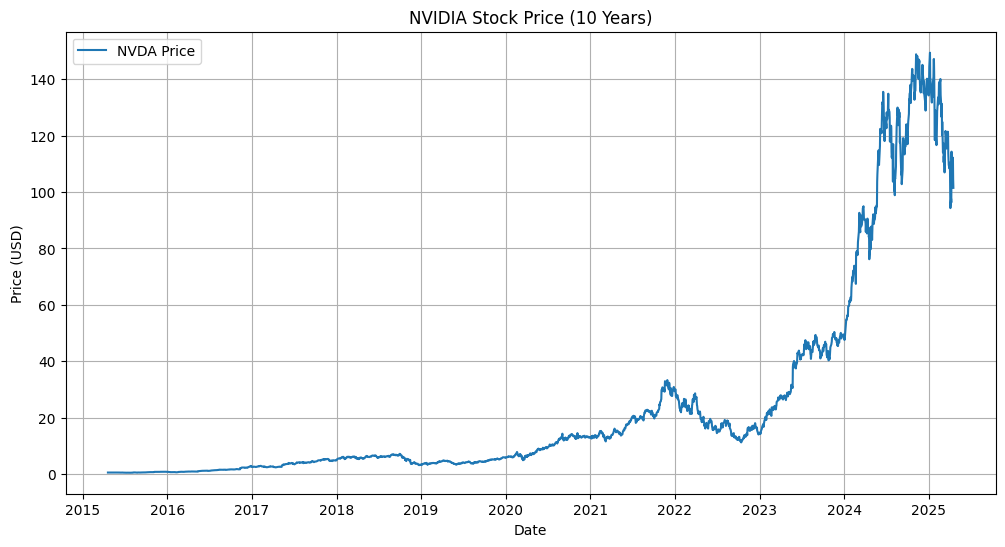

In [ ]:

data = data[['Close']]
data.dropna(inplace=True)
data.rename(columns={'Close': 'Price'}, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='NVDA Price')
plt.title("NVIDIA Stock Price (10 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


## 3. STL Decomposition (LOESS)

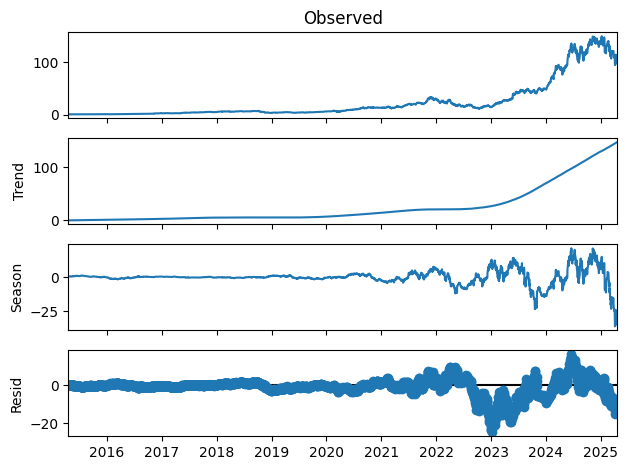

In [ ]:
from statsmodels.tsa.seasonal import STL


stl = STL(data['Price'], period=365)
res = stl.fit()
res.plot()
plt.show()



stl = STL(data['Price'], period=365, seasonal=13, trend=91, robust=True)


## 4.Stationairty Chcek (ADF test - Augmented Dickey-Fuller)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print(" Data is stationary")
    else:
        print(" Data is not stationary")

adf_test(data['Price'])


ADF Statistic: 0.24311846715903135
p-value: 0.9745788931478866
❌ Data is not stationary


## 5. Log Transformation and adf testing (Making Data Stationary)

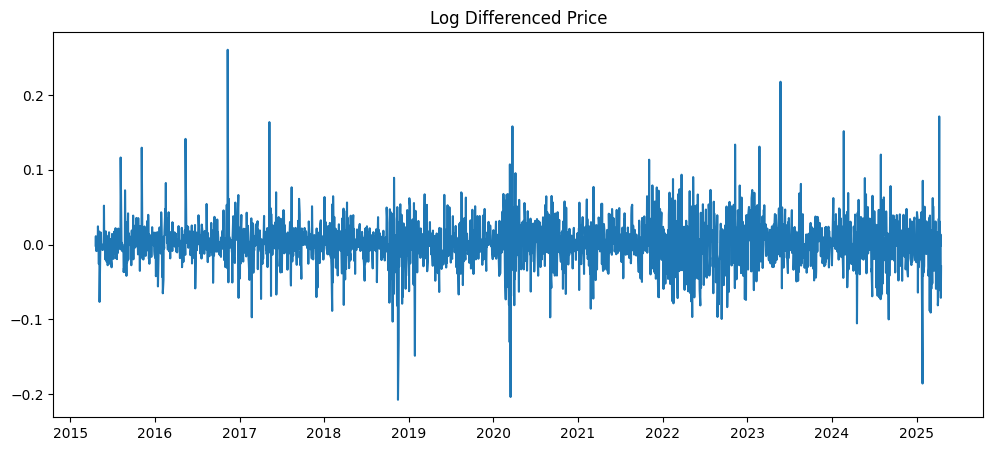

ADF Statistic: -17.849530375109342
p-value: 3.083407852315568e-30
✅ Data is stationary


In [ ]:
import numpy as np

# log transformation
data['LogPrice'] = np.log(data['Price'])
data['LogDiff'] = data['LogPrice'].diff()
data.dropna(inplace=True)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(data['LogDiff'])
plt.title('Log Differenced Price')
plt.show()

# Test stationarity again
adf_test(data['LogDiff'])


## 6. ACF, PACF Plots (Autocorrelation , Partial Autocorrelation Plots)

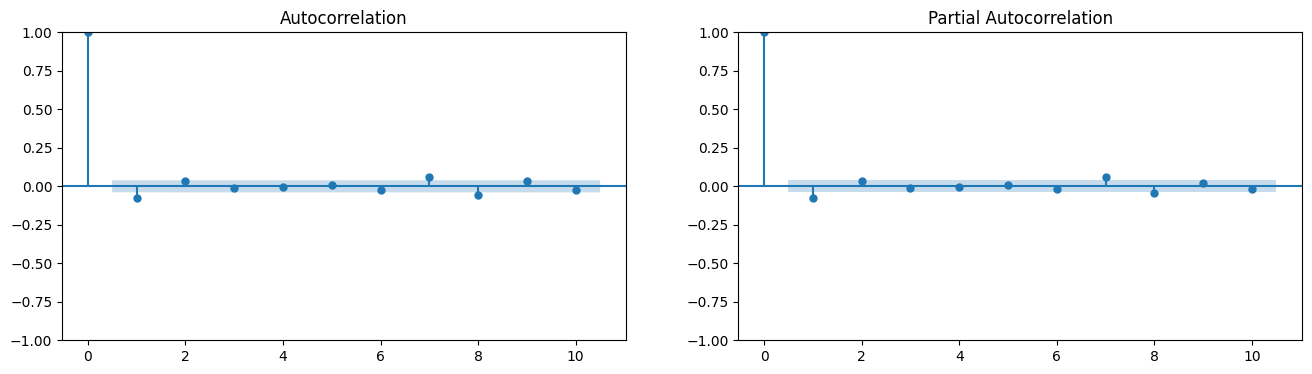

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data['LogDiff'], lags=10, ax=axes[0])
plot_pacf(data['LogDiff'], lags=10, ax=axes[1])
plt.show()


## 7. Fitting Auto_Arima with pmdarima

In [ ]:
from pmdarima import auto_arima

model1 = auto_arima(data['LogPrice'], start_p=1, start_q=1,
                             max_p=5, max_q=5, seasonal=False,
                             d=1, trace=True, error_action='ignore',
                             suppress_warnings=True, stepwise=True)
print(model1.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10294.864, Time=3.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10281.919, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10294.515, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10293.604, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10272.732, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-10293.052, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10293.102, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10294.716, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-10294.986, Time=1.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-10293.190, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-10291.201, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-10284.880, Time=0.19 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 8.339 seconds
                               SARIMAX Results                  

## 8. Manual ARIMA Modeling for p, d, q (Based on ACF, PACF Plots lags)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(p,d,q)
model2 = ARIMA(data['LogPrice'], order=(1,1,1))  # Adjust based on ACF/PACF
model_fit = model2.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               LogPrice   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5145.009
Date:                Sat, 19 Apr 2025   AIC                         -10284.017
Time:                        15:23:55   BIC                         -10266.529
Sample:                             0   HQIC                        -10277.670
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4981      0.160     -3.115      0.002      -0.811      -0.185
ma.L1          0.4295      0.166      2.583      0.010       0.104       0.755
sigma2         0.0010   1.34e-05     72.836      0.0

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

stepwise_model = auto_arima(data['LogPrice'], start_p=1, start_q=1,
                            max_p=5, max_q=5, seasonal=False,
                            d=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

print(stepwise_model.summary())

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


NameError: name 'data' is not defined

In [ ]:
import warnings


warnings.filterwarnings('ignore')



## 9. experimenting with all possible parameters (for loop with p, d, q )

In [ ]:
import pandas as pd
from pmdarima import auto_arima

results = []

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = auto_arima(data['LogPrice'], p=p, d=d, q=q, seasonal=False,
                                   trace=False, error_action='ignore', suppress_warnings=True)
                results.append((p, d, q, model.aic(), model.bic()))
            except Exception as e:
                print(f"Error with p={p}, d={d}, q={q}: {e}")
                continue

results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC', 'BIC'])

sorted_by_aic = results_df.sort_values(by='AIC')
sorted_by_bic = results_df.sort_values(by='BIC')


## 10. Model Evaluation (through AIC, BIC Values)

In [ ]:
sorted_by_aic.head(10)

,p,d,q,AIC,BIC
17,2,1,2,-10294.986398,-10271.667876
15,2,1,0,-10294.986398,-10271.667876
3,0,1,0,-10294.986398,-10271.667876
4,0,1,1,-10294.986398,-10271.667876
5,0,1,2,-10294.986398,-10271.667876
16,2,1,1,-10294.986398,-10271.667876
9,1,1,0,-10294.986398,-10271.667876
10,1,1,1,-10294.986398,-10271.667876
11,1,1,2,-10294.986398,-10271.667876
14,2,0,2,-10277.542960,-10254.222847


In [ ]:
sorted_by_bic.head(10)

,p,d,q,AIC,BIC
17,2,1,2,-10294.986398,-10271.667876
15,2,1,0,-10294.986398,-10271.667876
3,0,1,0,-10294.986398,-10271.667876
4,0,1,1,-10294.986398,-10271.667876
5,0,1,2,-10294.986398,-10271.667876
16,2,1,1,-10294.986398,-10271.667876
9,1,1,0,-10294.986398,-10271.667876
10,1,1,1,-10294.986398,-10271.667876
11,1,1,2,-10294.986398,-10271.667876
14,2,0,2,-10277.542960,-10254.222847


## 11. Model Evaluation (through residual Correlation - Ljung box Test)

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

# Multiple_ARIMAs
params = [
    (2, 1, 2),
    (2, 1, 0),
    (0, 1, 0),
    (0, 1, 1),
    (0, 1, 2),
    (2, 1, 1),
    (1, 1, 0),
    (1, 1, 1)
]


results = []

# Loop
for p, d, q in params:
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit()
    residuals = model_fit.resid

    # Ljung-Box test (lag=10)
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    lb_stat = lb_test['lb_stat'].values[0]
    p_value = lb_test['lb_pvalue'].values[0]


    results.append({
        'p': p,
        'd': d,
        'q': q,
        'Ljung-Box Statistic': lb_stat,
        'p-value': p_value
    })


df_results = pd.DataFrame(results)

print(df_results)


   p  d  q  Ljung-Box Statistic   p-value
0  2  1  2            12.842328  0.232622
1  2  1  0            13.112235  0.217464
2  0  1  0            30.031497  0.000847
3  0  1  1            16.230609  0.093219
4  0  1  2            13.360125  0.204228
5  2  1  1            13.010438  0.223089
6  1  1  0            15.390831  0.118449
7  1  1  1            13.492106  0.197443


## 12. Model Evaluation (through residual Correlation Plots - ACF, PACF)

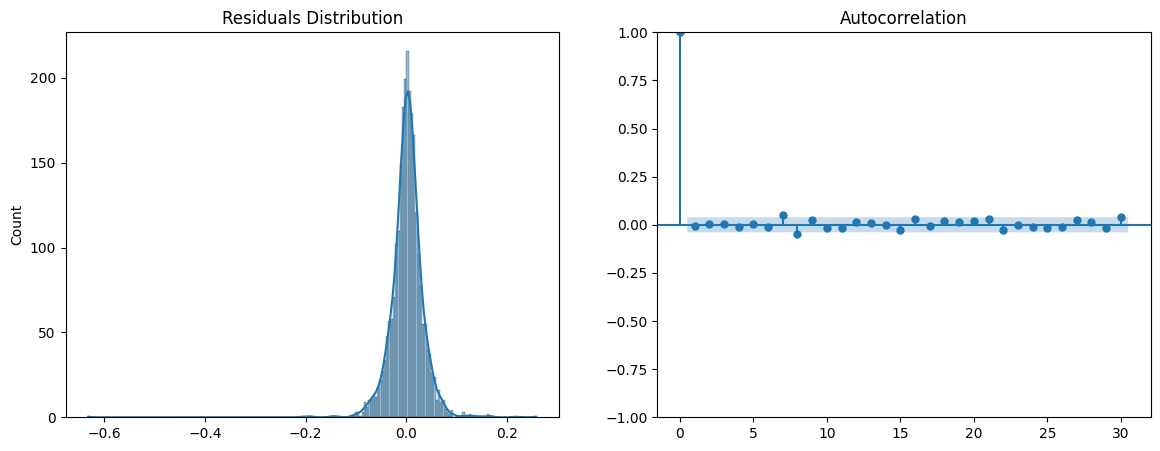

      lb_stat  lb_pvalue
10  14.452609   0.153329


In [ ]:
import seaborn as sns

residuals = model_fit.resid

#  residuals
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title('Residuals Distribution')
plot_acf(residuals, lags=30, ax=ax[1])
plt.show()

# Check white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)


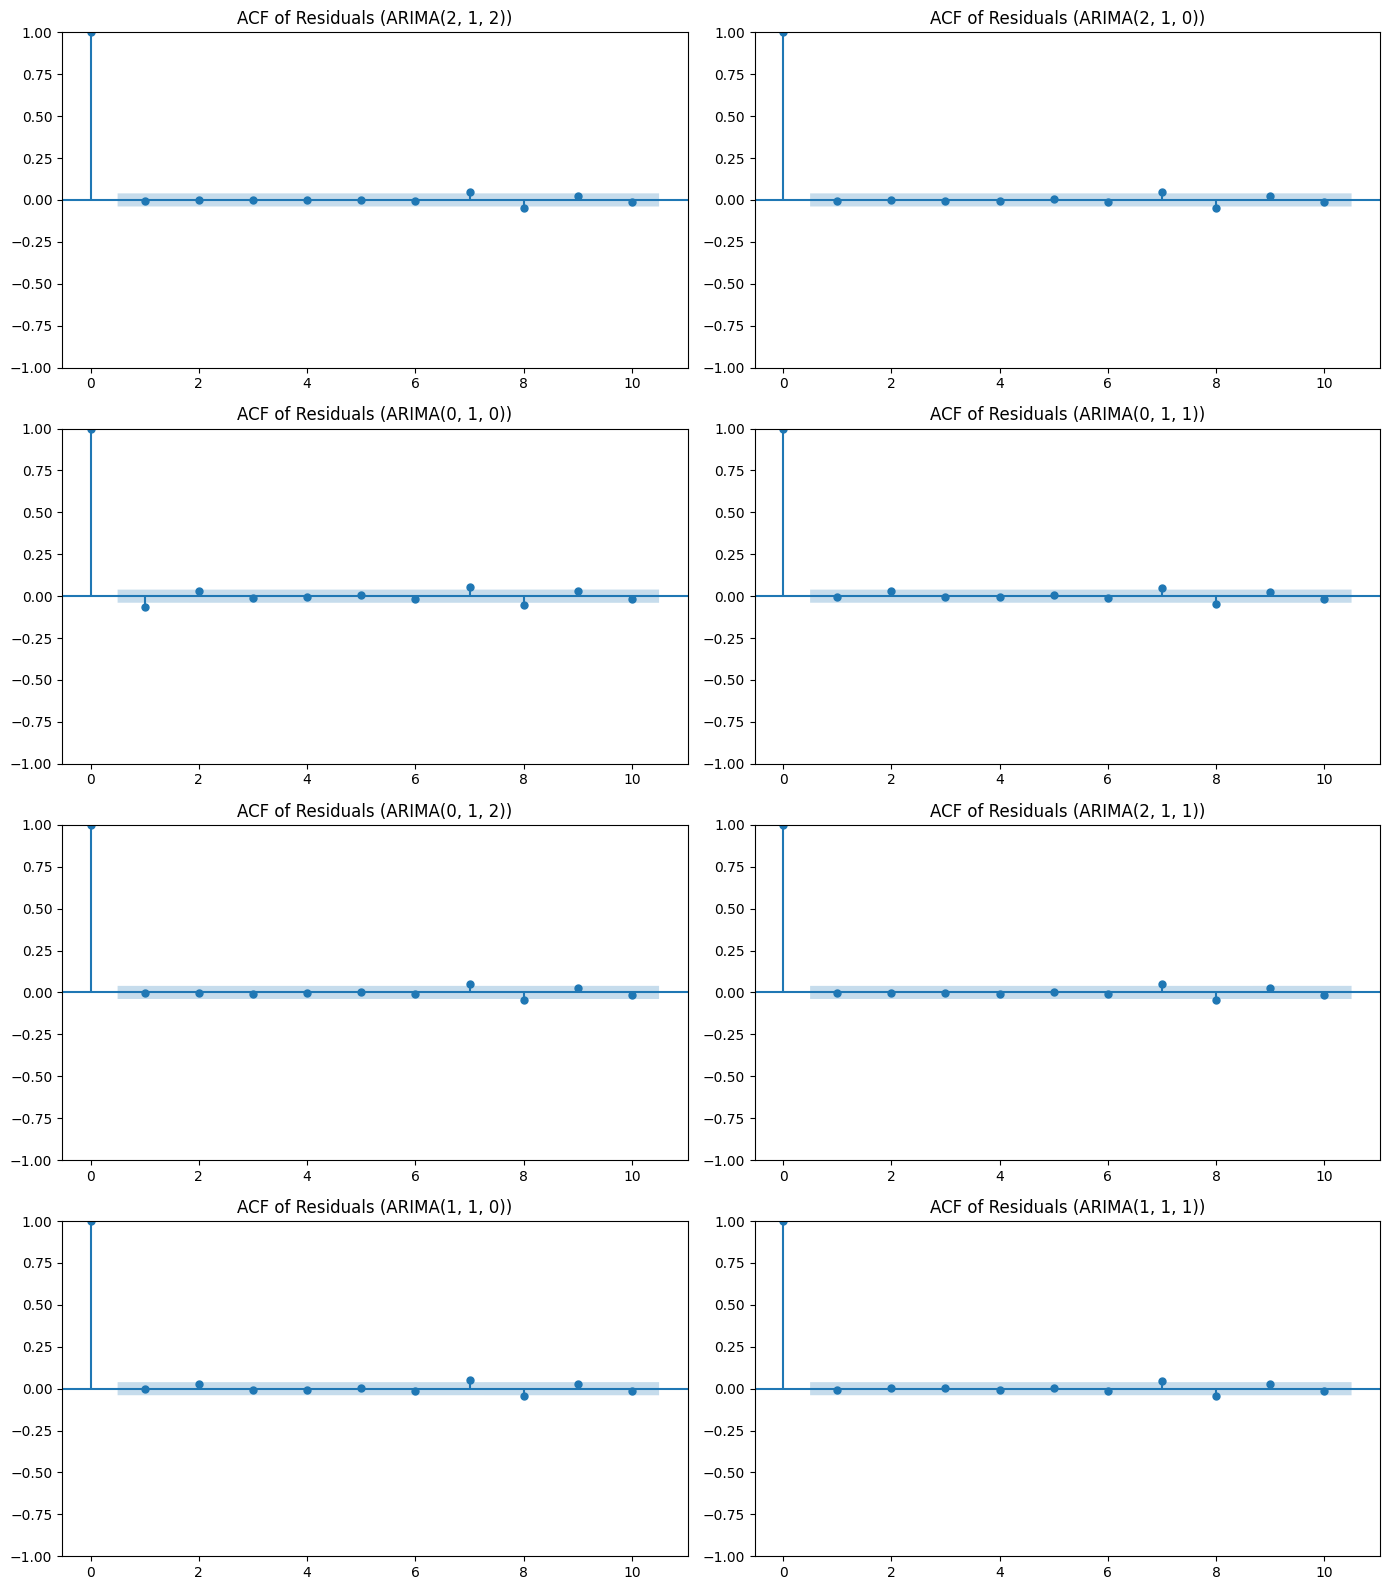

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

params = [
    (2, 1, 2),
    (2, 1, 0),
    (0, 1, 0),
    (0, 1, 1),
    (0, 1, 2),
    (2, 1, 1),
    (1, 1, 0),
    (1, 1, 1)
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()


for i, (p, d, q) in enumerate(params):
    model = ARIMA(data['LogPrice'], order=(p, d, q))
    model_fit = model.fit()
    residuals = model_fit.resid

    plot_acf(residuals, lags=10, ax=axes[i])
    axes[i].set_title(f'ACF of Residuals (ARIMA{p,d,q})')


plt.tight_layout()
plt.show()

## 13. Model Evaluation (through RMSE, MAE, MAPE Errors)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

data = yf.download(ticker, period="10y")['Close']

log_data = np.log(data.dropna())

train_size = int(len(log_data) * 0.8)
train = log_data[:train_size]

configs = [
    (2, 1, 2),
    (2, 1, 0),
    (0, 1, 0),
    (0, 1, 1),
    (0, 1, 2),
    (2, 1, 1),
    (1, 1, 0),
    (1, 1, 1)
]

# Iterate
for p, d, q in configs:
    try:
        model = ARIMA(train, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit()
        forecast_log = model_fit.forecast(steps=len(test))
        forecast = np.exp(forecast_log)
        actual = np.exp(test)

        rmse = np.sqrt(mean_squared_error(actual, forecast))
        print(f"{p},{d},{q} -> RMSE: {rmse:.4f}")
    except Exception as e:
        print(f"{p},{d},{q} -> Model failed ({str(e).splitlines()[0]})")


[*********************100%***********************]  1 of 1 completed


2,1,2 -> Model failed (y_true and y_pred have different number of output (3!=1))
2,1,0 -> Model failed (y_true and y_pred have different number of output (3!=1))
0,1,0 -> Model failed (y_true and y_pred have different number of output (3!=1))
0,1,1 -> Model failed (y_true and y_pred have different number of output (3!=1))
0,1,2 -> Model failed (y_true and y_pred have different number of output (3!=1))
2,1,1 -> Model failed (y_true and y_pred have different number of output (3!=1))
1,1,0 -> Model failed (y_true and y_pred have different number of output (3!=1))
1,1,1 -> Model failed (y_true and y_pred have different number of output (3!=1))


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")


data = yf.download(ticker, period="10y")['Close']
data = np.log(data.dropna())


train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


configs = [
    (2, 1, 2),
    (2, 1, 0),
    (0, 1, 0),
    (0, 1, 1),
    (0, 1, 2),
    (2, 1, 1),
    (1, 1, 0),
    (1, 1, 1)
]

# Evaluate
for p, d, q in configs:
    try:
        model = ARIMA(train, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit()
        forecast_log = model_fit.forecast(steps=len(test))
        forecast = np.exp(forecast_log)
        actual = np.exp(test)

        rmse = np.sqrt(mean_squared_error(actual, forecast))
        print(f"{p},{d},{q} -> RMSE: {rmse:.4f}")
    except Exception as e:
        print(f"{p},{d},{q} -> Model failed ({str(e).splitlines()[0]})")


[*********************100%***********************]  1 of 1 completed


2,1,2 -> RMSE: 71.5377
2,1,0 -> RMSE: 71.5226
0,1,0 -> RMSE: 71.5118
0,1,1 -> RMSE: 71.5282
0,1,2 -> RMSE: 71.5234
2,1,1 -> RMSE: 71.5467
1,1,0 -> RMSE: 71.5277
1,1,1 -> RMSE: 71.5236


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")


ticker = 'NVDA'
data = yf.download(ticker, period="10y")['Close']
data = np.log(data.dropna())


train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

train = train.values
test = test.values

configs = [
    (2, 1, 2),
    (2, 1, 0),
    (0, 1, 0),
    (0, 1, 1),
    (0, 1, 2),
    (2, 1, 1),
    (1, 1, 0),
    (1, 1, 1)
]

results = []

def smape(y_true, y_pred, epsilon=1e-6):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon))

def mape(y_true, y_pred):
    y_true = np.where(y_true == 0, 1e-6, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate each model
for p, d, q in configs:
    try:
        model = ARIMA(train, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit()

        forecast_log = model_fit.forecast(steps=len(test))
        forecast = np.exp(forecast_log)
        actual = np.exp(test)

        rmse = np.sqrt(mean_squared_error(actual, forecast))
        mae = mean_absolute_error(actual, forecast)
        mape_value = mape(actual, forecast)  # MAPE function
        smape_value = smape(actual, forecast)  #sMAPE function

        results.append({
            'p': p,
            'd': d,
            'q': q,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape_value,
            'sMAPE': smape_value
        })

    except Exception as e:
        # Handling the failing cases
        print(f"{p},{d},{q} -> Model failed ({str(e).splitlines()[0]})")
        results.append({
            'p': p,
            'd': d,
            'q': q,
            'RMSE': np.nan,
            'MAE': np.nan,
            'MAPE': np.nan,
            'sMAPE': np.nan
        })

error_df = pd.DataFrame(results)

print(error_df)


[*********************100%***********************]  1 of 1 completed


   p  d  q       RMSE        MAE       MAPE      sMAPE
0  2  1  2  71.537736  59.988203  60.235260  92.324568
1  2  1  0  71.522620  59.970255  60.208700  92.274512
2  0  1  0  71.511816  59.957405  60.189686  92.238691
3  0  1  1  71.528201  59.976870  60.218490  92.292960
4  0  1  2  71.523445  59.971238  60.210155  92.277255
5  2  1  1  71.546741  59.998828  60.250975  92.354193
6  1  1  0  71.527728  59.976311  60.217661  92.291399
7  1  1  1  71.523608  59.971420  60.210425  92.277763


## 14. Choosing the Best ARIMA Model



When RMSE values are **very similar**, selecting the best model involves more than just picking the lowest RMSE. Here’s how to decide:

---

####  1. Prioritize Simplicity (Parsimony)
> **If RMSEs are nearly the same, go with the model that has fewer parameters.**

| Model       | AR | MA | Total Params |
|-------------|----|----|---------------|
| ARIMA(0,1,0) | 0  | 0  | 0 (Simplest)  |
| ARIMA(1,1,0) | 1  | 0  | 1             |
| ARIMA(0,1,1) | 0  | 1  | 1             |
| ARIMA(1,1,1) | 1  | 1  | 2             |
| ARIMA(2,1,2) | 2  | 2  | 4 (Most Complex) |

**Pick the model with the fewest parameters if RMSEs are nearly identical.**

---

####  2. Residual Analysis (Ljung-Box Test)

Check if model residuals resemble **white noise** using the Ljung-Box test.

-  **Good model:** High p-value (> 0.05) ➝ residuals are random
- **Bad model:** Low p-value ➝ residuals are autocorrelated

Combine RMSE with **Ljung-Box p-values** to make the decision.

---

#### 3. Use AIC / BIC for Model Selection

AIC and BIC penalize model complexity:

```python
print(model_fit.aic, model_fit.bic)



## 15. Predicting the NVIDIA Stock Price (ARIMA vs SARIMA)

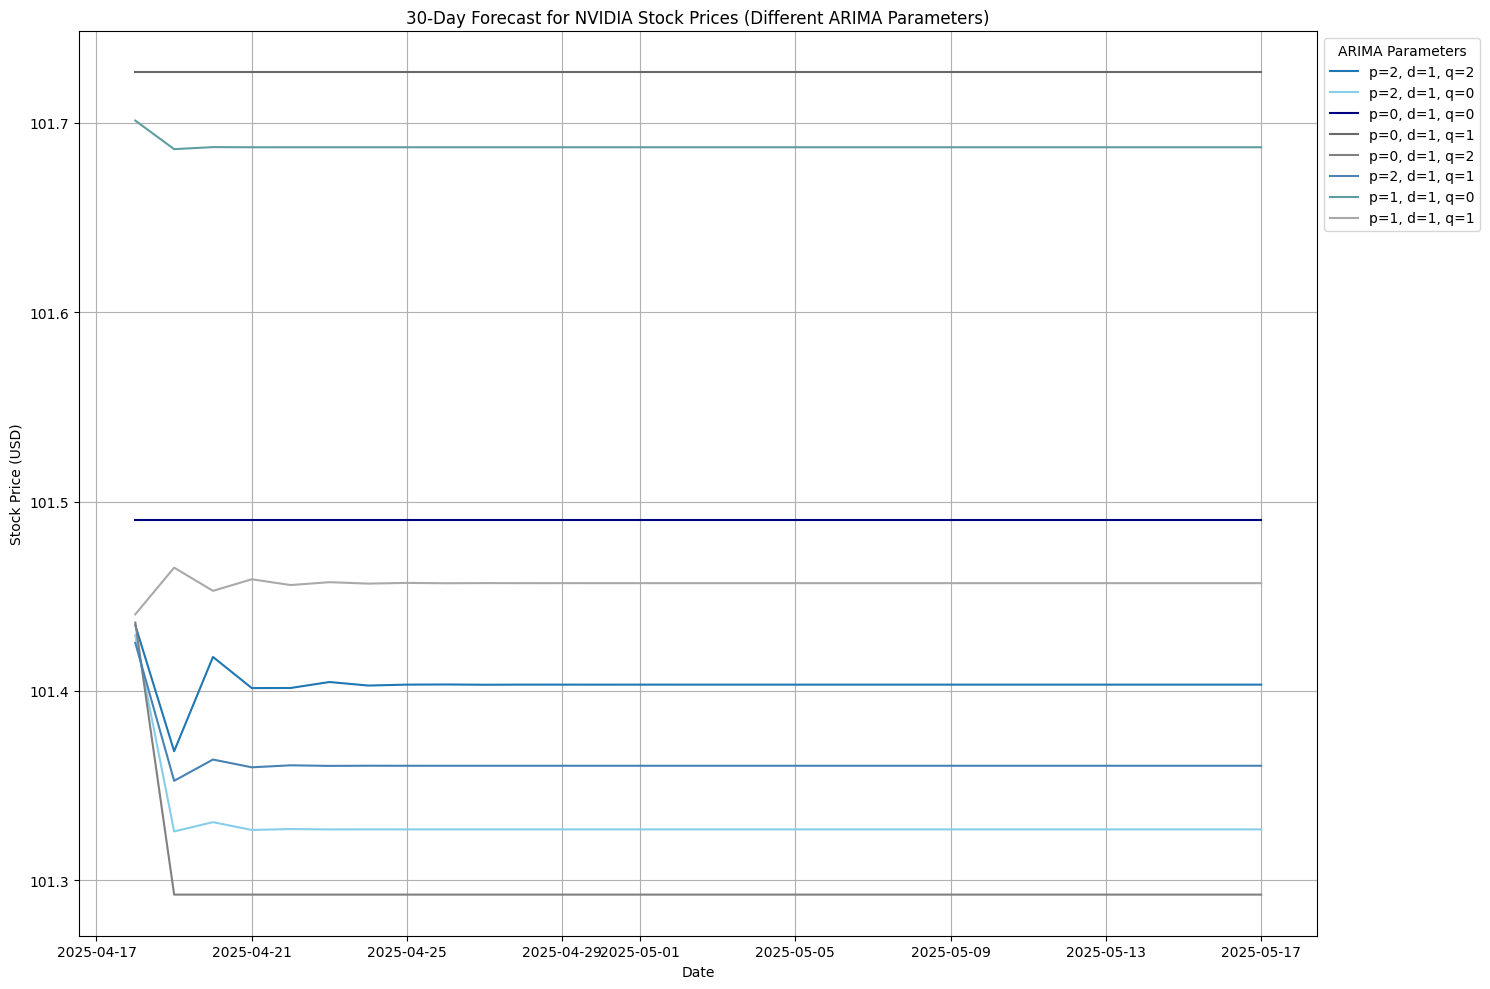

In [ ]:
# Iterate through each (p, d, q) combination

pdq_values = [(2, 1, 2), (2, 1, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2),
              (2, 1, 1), (1, 1, 0), (1, 1, 1)]

plt.figure(figsize=(15, 10))

colors = ['#1f77b4', '#87CEEB', '#000080', '#696969', '#808080',
          '#4682B4', '#5F9EA0', '#A9A9A9']

forecast_period = 30

for i, (p, d, q) in enumerate(pdq_values):
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit()

    forecast_log = model_fit.forecast(steps=forecast_period)
    forecast = np.exp(forecast_log)

    forecast_index = pd.date_range(data.index[-1], periods=forecast_period + 1, freq='D')[1:]
    plt.plot(forecast_index, forecast, label=f"p={p}, d={d}, q={q}", color=colors[i])

plt.title('30-Day Forecast for NVIDIA Stock Prices (Different ARIMA Parameters)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(title='ARIMA Parameters', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-8316.529, Time=2.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-8316.227, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-8323.742, Time=1.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-8323.328, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-8310.082, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-8324.893, Time=0.34 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-8323.738, Time=1.46 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-8321.460, Time=2.90 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-8323.658, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-8323.442, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-8324.427, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-8321.961, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=-8317.514, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[12] intercept
Total fit time: 11.817 se

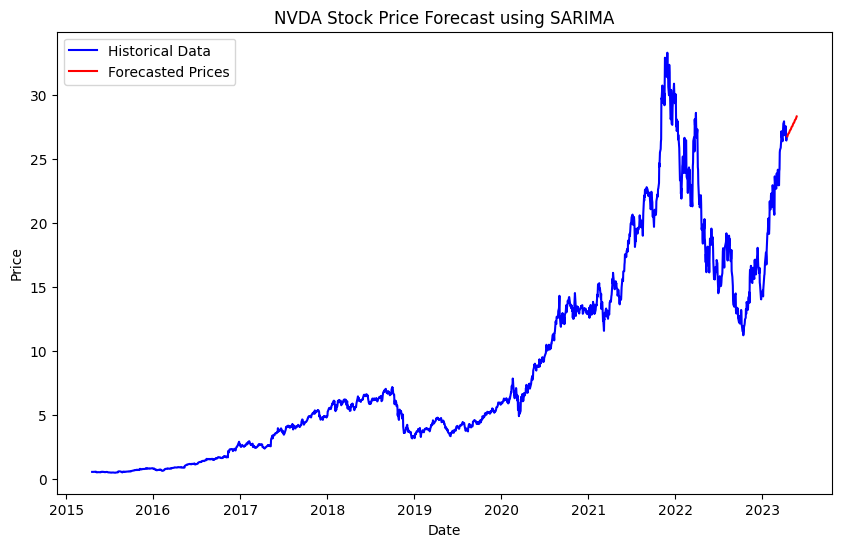

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import pmdarima as pm
import matplotlib.pyplot as plt

ticker = 'NVDA'
data = yf.download(ticker, period="10y")['Close']
data = np.log(data.dropna())

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

model = pm.auto_arima(train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

print(model.summary())

forecast = model.predict(n_periods=30)

forecast_prices = np.exp(forecast)

plt.figure(figsize=(10,6))

plt.plot(data.index[:train_size], np.exp(train), label="Historical Data", color="blue")

forecast_index = pd.date_range(start=data.index[train_size], periods=30, freq='B')
plt.plot(forecast_index, forecast_prices, label="Forecasted Prices", color="red")

plt.title(f"{ticker} Stock Price Forecast using SARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
